In [1]:
pip install yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 640.0 kB/s eta 0:00:05
     --- ------------------------------------ 0.2/3.0 MB 3.0 MB/s eta 0:00:01
     -------- ------------------------------- 0.6/3.0 MB 4.8 MB/s eta 0:00:01
     ------------ --------------------------- 1.0/3.0 MB 5.5 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 6.2 MB/s eta 0:00:01
     ----------------------- ---------------- 1.8/3.0 MB 6.5 MB/s eta 0:00:01
     ---------------------------- ----------- 2.1/3.0 MB 6.8 MB/s eta 0:00:01
     --------------------------------- ------ 2.5/3.0 MB 6.9 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 7.1 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 7.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: start

In [3]:
#Importing the required Libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [5]:
#Fetch Historical Stock Data (Apple's)
ticker = "AAPL"
df = yf.download(ticker,start="2024-01-01",end="2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [9]:
#Using only Clossing Prices
df = df[['Close']]

In [11]:
#Creating Features: Predict next day's close using past N days
N = 5
for i in range(1,N+1):
    df[f'Close_lag_{i}'] = df['Close'].shift(i)
    

C:\Users\Prashant\AppData\Local\Temp\ipykernel_840\2926881882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Close_lag_{i}'] = df['Close'].shift(i)
C:\Users\Prashant\AppData\Local\Temp\ipykernel_840\2926881882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Close_lag_{i}'] = df['Close'].shift(i)
C:\Users\Prashant\AppData\Local\Temp\ipykernel_840\2926881882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [13]:
#Dropping missing values
df.dropna(inplace=True)


In [15]:
#Defining Features and Target
X = df[[f'Close_lag_{i}' for i in range(1,N+1)]]
y = df['Close']

In [17]:
#Splitting the Data
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle = False,test_size=0.2)


In [19]:
#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [23]:
#Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error on Test Set: {mse:.2f}')


Mean Squared Error on Test Set: 5.81


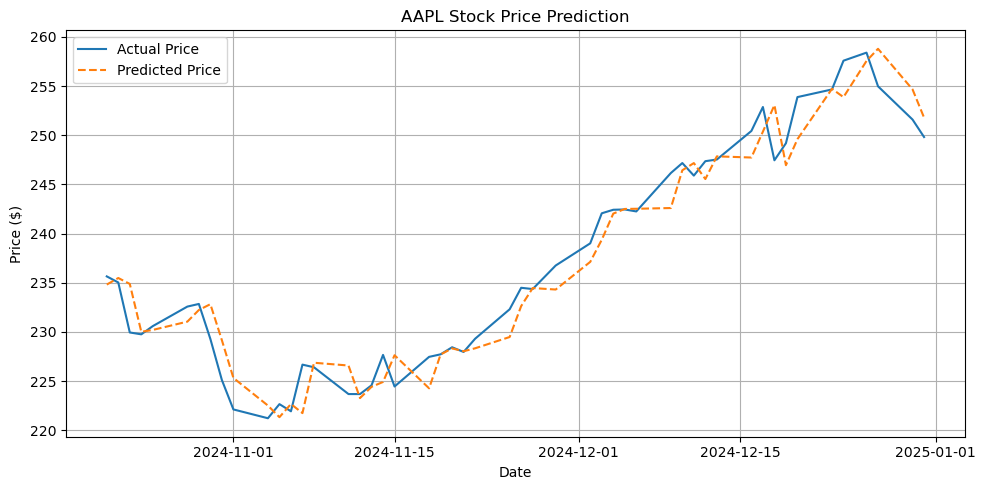

In [25]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price', linestyle='--')
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()